In [1]:
# This notebook is for feature selection process

In [2]:
# Import all the necessary libraries

import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

# To allow plots to appear within the notebook
%matplotlib inline

In [3]:
# Load and read the dataset

df = pd.read_csv('Riza_Capstone_Original Dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
# See the statistical summary

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# See the class distribution

df.groupby('DEATH_EVENT').size()

DEATH_EVENT
0    203
1     96
dtype: int64

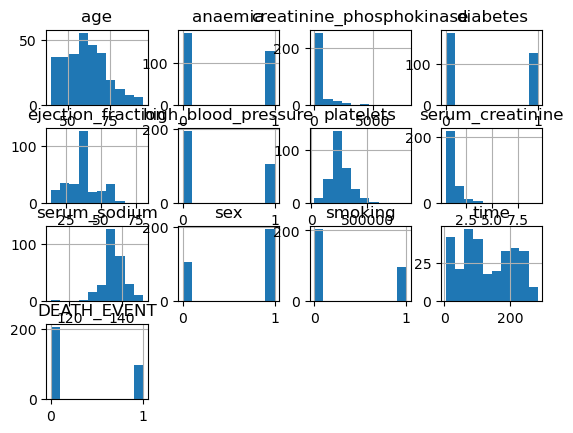

In [6]:
# Show the histogram for distribution

df.hist()
plot.show()

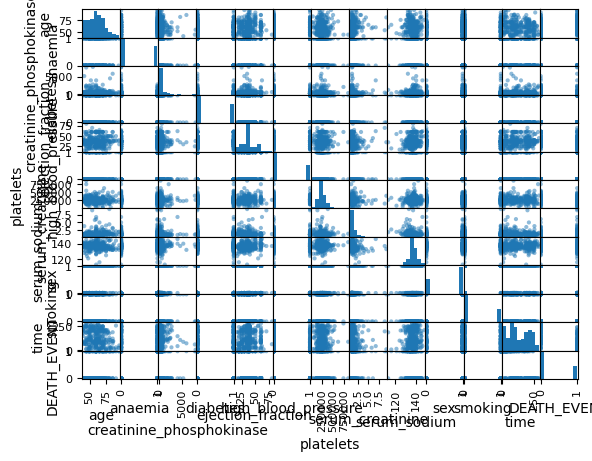

In [7]:
# Show the multivariate plot

from pandas.plotting import scatter_matrix
scatter_matrix(df)
plot.show()

In [8]:
# Check if the datatypes are correct for all columns

df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [9]:
# age must be int64
df['age'] = df['age'].astype('int64')

# anaemia must be int64
df['anaemia'] = df['anaemia'].astype('int64')

# creatinine_phosphokinase must be int64
df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].astype('int64')

# platelets must be int64
df['platelets'] = df['platelets'].astype('int64')


## Look again at the datatypes after corrections

df.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [10]:
# Create an independent variable X

X = df.iloc[:, 1:12].values
X

array([[0.000e+00, 5.820e+02, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [0.000e+00, 7.861e+03, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [0.000e+00, 1.460e+02, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [0.000e+00, 2.060e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [0.000e+00, 2.413e+03, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [0.000e+00, 1.960e+02, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [11]:
# Create a dependent variable Y

Y = df.iloc[:, 12:].values
Y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [12]:
# Perform feature scaling

from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X = minmaxscaler.fit_transform(X)

List of Features:
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']

Selection Scores: [7.46593411e-01 2.52028846e-01 6.56814450e-04 1.89451597e+00
 1.22153853e+00 3.50213698e-02 3.47161030e+00 2.67367929e-01
 1.95626598e-03 3.23468288e-02 1.40502858e+01]

Features and the Selection Scores



<AxesSubplot: >

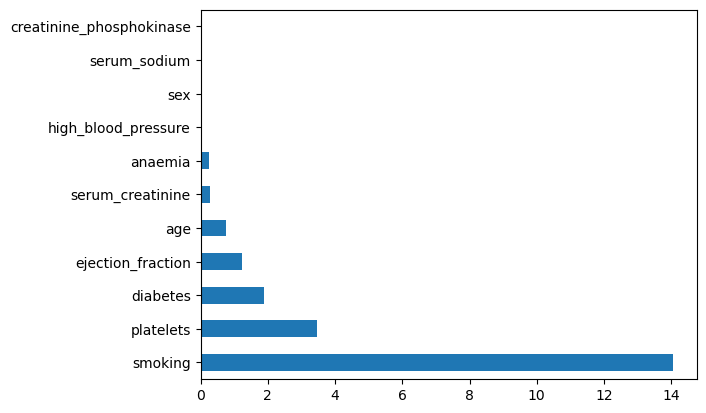

In [13]:
# To Import the Class of SelectKBest and chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# For the List of Features
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 
           'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']
print('List of Features:')
print(features)
print('')

# To Perform Feature Selection with SelectKBest
selection_method_skb = SelectKBest(score_func=chi2, k=8)
selection_fit_skb = selection_method_skb.fit(X, Y)

# To Show the Results of Feature Selection
selection_scores = selection_fit_skb.scores_
print('Selection Scores: %s' % selection_scores)
print('')

print('Features and the Selection Scores')
list(zip(features, selection_scores))
print('')

feat_importances = pd.Series(selection_scores, index=features)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']

Number of Features: 8
Selected Features: [ True  True False  True False  True  True  True  True False  True]
Feature's Ranking: [1 1 4 1 3 1 1 1 1 2 1]

Features, Selected Features, and the Ranking Score:


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

<AxesSubplot: >

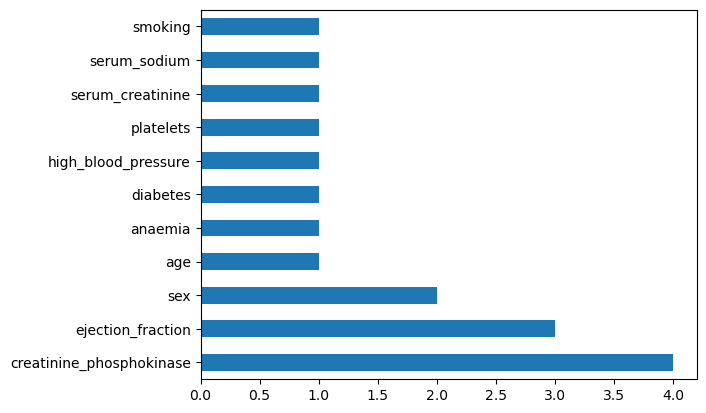

In [14]:
# To Import the Class of RFE
from sklearn.feature_selection import RFE

# For the List of Features
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 
           'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']
print(features)
print('')

# To Perform Feature Extraction with RFE using Logistic Regression as the Model
# To Import the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(random_state=0)
selection_method_rfe = RFE(estimator=logistic_regression, n_features_to_select=8) 
# Note: Logistic Regression has "coef_" or "feature_importances_" attributes (unlike KNN and SVM) that can be used by RFE 
selection_fit_rfe = selection_method_rfe.fit(X, Y)

# To Show the Results of Feature Selection
number_features = selection_fit_rfe.n_features_
selected_features = selection_fit_rfe.support_
features_ranking = selection_fit_rfe.ranking_

print("Number of Features: %s" % number_features)
print("Selected Features: %s" % selected_features)
print("Feature's Ranking: %s" % features_ranking)
print('')

print('Features, Selected Features, and the Ranking Score:')
list(zip(features, selected_features, features_ranking))

feat_importances = pd.Series(features_ranking, index=features)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [15]:
# To Import the Class of PCA
from sklearn.decomposition import PCA

# For the List of Features
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 
           'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']
print('List of Features:')
print(features)
print('')

# To Perform Feature Selection with PCA
selection_method_pca = PCA(n_components=6)
selection_fit_pca = selection_method_pca.fit(X)

# To Summarize the Principal Components
explained_variance = selection_fit_pca.explained_variance_ratio_
print("Explained Variance: %s" % explained_variance)
print('')

print("For the Transformed Component:")
components = selection_fit_pca.components_
print(components)

List of Features:
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']

Explained Variance: [0.27067036 0.19208713 0.17063547 0.1550483  0.09291082 0.05291127]

For the Transformed Component:
[[ 2.64423920e-01 -2.08396764e-02  3.64571472e-01  3.78374506e-02
   1.86043156e-01  1.56673376e-02  1.37216111e-03  1.43203560e-04
  -6.35785780e-01 -5.96569660e-01 -1.79812783e-02]
 [ 6.95718380e-01 -3.82155892e-02 -5.81897868e-01  9.45975617e-03
   3.87555556e-01 -1.67929894e-02  1.71748220e-02  2.23871431e-02
   3.58749198e-02  4.13563009e-02 -1.46785773e-01]
 [-5.74350199e-01  1.44473607e-02 -1.46006868e-01  6.04023380e-03
   7.96724383e-01  1.70219249e-02 -6.14134355e-03  5.29718706e-03
  -9.49317989e-02  8.13429698e-03 -6.59936035e-02]
 [ 3.18421818e-01 -2.15997754e-02  7.10973190e-01 -2.84503174e-02
   3.85734479e-01  1.18211978e-02 -4.54862076e-03 -1.65429539e-02
   3.22435

List of Features:
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']



C:\Users\AMD\AppData\Local\Temp\ipykernel_2068\826156721.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, Y)


Importance Score: [0.02742384 0.09158498 0.03216437 0.13959035 0.02164913 0.08720695
 0.14273259 0.09760376 0.02601323 0.03137675 0.30265406]

Features and the Importance Score:


<AxesSubplot: >

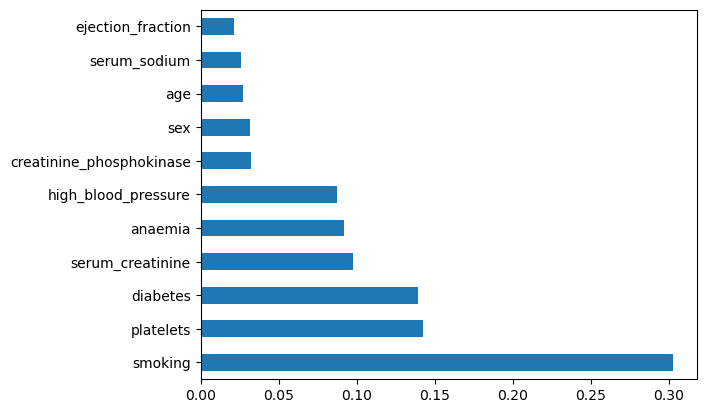

In [16]:
# To Import Class ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

# For the List of Features
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 
           'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']
print('List of Features:')
print(features)
print('')

# To Perform Feature Importance with Extra Trees Classifier
model = ExtraTreesClassifier()
model.fit(X, Y)

# To Show the Results of Feature Importance
importance = model.feature_importances_
print('Importance Score: %s' % importance)
print('')

print('Features and the Importance Score:')
list(zip(features, importance))

feat_importances = pd.Series(importance, index=features)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')